# MLB Baseball Analytics

In this project, we are going to use machine learning models to predict the number of games that a Major-League Baseball team won that season based on the team's stats and other variables for the season.

### Importing Data

The data for the 2016 MLB season is already compiled by Sean Lahman on his [website.](http://www.seanlahman.com/baseball-archive/statistics/)

Then the data was transformed into an SQLite database [here.](https://github.com/jknecht/baseball-archive-sqlite)

In [40]:
import numpy as np
import pandas as pd
import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Connecting to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

Now that we are connected to the SQLite database, we are now going to query for all season where a team played 150 or more games and is still active today

In [3]:
query = '''
    SELECT * 
    FROM Teams 
    INNER JOIN TeamsFranchises ON Teams.franchID == TeamsFranchises.franchID
    WHERE Teams.G >= 150 AND TeamsFranchises.active == 'Y';
'''

Teams = conn.execute(query).fetchall()

# Convert results to DataFrame
teams_df = pd.DataFrame(Teams)

In [4]:
teams_df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


### Data Cleaning and Processing

As you can see from the table above, the column names are not included. And so we need to add the column names. Some of the more important variables are noted below. But a full list of all variable descriptions can be found on [Sean Lahman's website's readme.](http://seanlahman.com/files/database/readme2016.txt)

    yearID - Year
    teamID - Team
    franchID - Franchise (links to TeamsFranchise table)
    G - Games played
    W - Wins
    LgWin - League Champion(Y or N)
    WSWin - World Series Winner (Y or N)
    R - Runs scored
    AB - At bats
    H - Hits by batters
    HR - Homeruns by batters
    BB - Walks by batters
    SO - Strikeouts by batters
    SB - Stolen bases
    CS - Caught stealing
    HBP - Batters hit by pitch
    SF - Sacrifice flies
    RA - Opponents runs scored
    ER - Earned runs allowed
    ERA - Earned run average
    CG - Complete games
    SHO - Shutouts
    SV - Saves
    IPOuts - Outs Pitched (innings pitched x 3)
    HA - Hits allowed
    HRA - Homeruns allowed
    BBA - Walks allowed
    SOA - Strikeouts by pitchers
    E - Errors
    DP - Double Plays
    FP - Fielding percentage
    name - Team’s full name

Now we are going to add column headers based on the variable names we find in the readme.

In [5]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

In [6]:
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


Taking a look at info below, it looks like there is a total of 2,287 rows and there are some null values that we need to deal with.

In [7]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 52 columns):
yearID            2287 non-null int64
lgID              2287 non-null object
teamID            2287 non-null object
franchID          2287 non-null object
divID             1236 non-null object
Rank              2287 non-null int64
G                 2287 non-null int64
Ghome             2265 non-null float64
W                 2287 non-null int64
L                 2287 non-null int64
DivWin            1236 non-null object
WCWin             626 non-null object
LgWin             2287 non-null object
WSWin             2249 non-null object
R                 2287 non-null int64
AB                2287 non-null int64
H                 2287 non-null int64
2B                2287 non-null int64
3B                2287 non-null int64
HR                2287 non-null int64
BB                2287 non-null int64
SO                2177 non-null float64
SB                2287 non-null int64
CS      

##### Dropping Columns

There are some variables that we could eliminate as they aren't related at all to the target column (Wins).

In [8]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis=1)

In [9]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,14,33,4323,1259,91,563,847,123,149.0,0.981


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 29 columns):
yearID    2287 non-null int64
teamID    2287 non-null object
G         2287 non-null int64
W         2287 non-null int64
R         2287 non-null int64
AB        2287 non-null int64
H         2287 non-null int64
2B        2287 non-null int64
3B        2287 non-null int64
HR        2287 non-null int64
BB        2287 non-null int64
SO        2177 non-null float64
SB        2287 non-null int64
CS        1868 non-null float64
HBP       510 non-null float64
RA        2287 non-null int64
ER        2287 non-null int64
ERA       2287 non-null float64
CG        2287 non-null int64
SHO       2287 non-null int64
SV        2287 non-null int64
IPouts    2287 non-null int64
HA        2287 non-null int64
HRA       2287 non-null int64
BBA       2287 non-null int64
SOA       2287 non-null int64
E         2287 non-null int64
DP        2265 non-null float64
FP        2287 non-null float64
dtypes: flo

##### Null values

Now let's deal with the null values. There is a tradeoff when we are dealing with null values - we need clean data but we don't have a large amount of data to spare. Two of the columns have a relatively small amount of null values. There are 110 null values in the SO (Strike Outs) column and 22 in the DP (Double Play) column. Two of the columns have a relatively large amount of them. There are 419 null values in the CS (Caught Stealing) column and 1777 in the HBP (Hit by Pitch) column.

It looks we'll be better off by keeping the rows and filling the null values with the median value from each of the columns.

Caught stealing (CS) and hit by pitch (HBP) aren’t very important variables either. With so many null values in these columns, it’s best to eliminate the columns all together.

In [11]:
# Eliminating columns with null values
df = df.drop(['CS','HBP'], axis=1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 27 columns):
yearID    2287 non-null int64
teamID    2287 non-null object
G         2287 non-null int64
W         2287 non-null int64
R         2287 non-null int64
AB        2287 non-null int64
H         2287 non-null int64
2B        2287 non-null int64
3B        2287 non-null int64
HR        2287 non-null int64
BB        2287 non-null int64
SO        2287 non-null float64
SB        2287 non-null int64
RA        2287 non-null int64
ER        2287 non-null int64
ERA       2287 non-null float64
CG        2287 non-null int64
SHO       2287 non-null int64
SV        2287 non-null int64
IPouts    2287 non-null int64
HA        2287 non-null int64
HRA       2287 non-null int64
BBA       2287 non-null int64
SOA       2287 non-null int64
E         2287 non-null int64
DP        2287 non-null float64
FP        2287 non-null float64
dtypes: float64(4), int64(22), object(1)
memory usage: 482.5+ KB


### Exploratory Data Analysis and Visualization

Now that the data is cleaned up, let's explore the data with some simple visualizations.

Let's start off with the distribution of wins

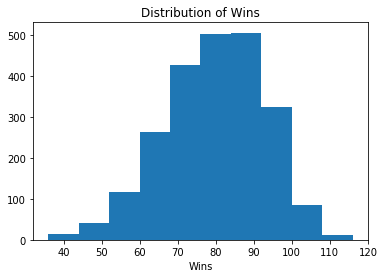

In [14]:
# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [15]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

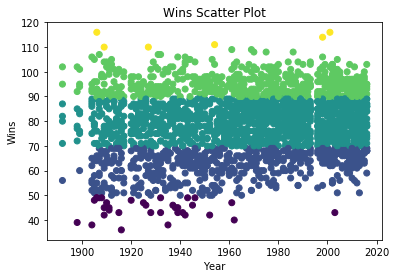

In [16]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

##### Dropping rows before 1900

From the scatter plot above, we could see that the seasons before 1900 were very different in terms of the number of teams and games. So we are going to drop all the years before 1900.

In [17]:
df = df[df['yearID'] > 1900]

##### Visualizing the scoring

Through the decades, there are different eras in baseball based on scoring. The early 1900's known as the "dead ball era" is an example of a lower scoring era. While at the turn of the 21st century, it was called the "steroid era" which was a high scoring era.

In [18]:
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

In [19]:
runs_per_year

{1904: 9307,
 1905: 9640,
 1906: 8322,
 1907: 8186,
 1908: 8423,
 1909: 8805,
 1910: 9580,
 1911: 11164,
 1912: 11154,
 1913: 9964,
 1914: 9408,
 1915: 9444,
 1916: 8889,
 1917: 8948,
 1920: 10762,
 1921: 11935,
 1922: 12059,
 1923: 11874,
 1924: 11722,
 1925: 12596,
 1926: 11443,
 1927: 11745,
 1928: 11645,
 1929: 12747,
 1930: 13695,
 1931: 11892,
 1932: 12116,
 1933: 10288,
 1934: 11325,
 1935: 10498,
 1936: 12846,
 1937: 12070,
 1938: 11260,
 1939: 11876,
 1940: 11568,
 1941: 11168,
 1942: 9457,
 1943: 9694,
 1944: 10353,
 1945: 9729,
 1946: 9953,
 1947: 10827,
 1948: 11328,
 1949: 11426,
 1950: 12013,
 1951: 11268,
 1952: 10349,
 1953: 11426,
 1954: 10827,
 1955: 11069,
 1956: 11031,
 1957: 10636,
 1958: 10578,
 1959: 10853,
 1960: 10664,
 1961: 12942,
 1962: 14461,
 1963: 12780,
 1964: 13124,
 1965: 12946,
 1966: 12900,
 1967: 12210,
 1968: 11109,
 1969: 15850,
 1970: 16880,
 1971: 15073,
 1972: 13706,
 1973: 16376,
 1974: 16046,
 1975: 16295,
 1976: 15492,
 1977: 18803,
 1978: 1

In [20]:
games_per_year

{1904: 2498,
 1905: 2474,
 1906: 2307,
 1907: 2317,
 1908: 2488,
 1909: 2482,
 1910: 2498,
 1911: 2474,
 1912: 2464,
 1913: 2468,
 1914: 2512,
 1915: 2490,
 1916: 2494,
 1917: 2494,
 1920: 2468,
 1921: 2458,
 1922: 2476,
 1923: 2466,
 1924: 2462,
 1925: 2456,
 1926: 2468,
 1927: 2472,
 1928: 2462,
 1929: 2458,
 1930: 2468,
 1931: 2472,
 1932: 2466,
 1933: 2303,
 1934: 2297,
 1935: 2158,
 1936: 2476,
 1937: 2478,
 1938: 2297,
 1939: 2462,
 1940: 2472,
 1941: 2488,
 1942: 2300,
 1943: 2476,
 1944: 2484,
 1945: 2313,
 1946: 2484,
 1947: 2486,
 1948: 2474,
 1949: 2480,
 1950: 2476,
 1951: 2478,
 1952: 2478,
 1953: 2480,
 1954: 2474,
 1955: 2468,
 1956: 2478,
 1957: 2470,
 1958: 2470,
 1959: 2476,
 1960: 2472,
 1961: 2860,
 1962: 3242,
 1963: 3238,
 1964: 3252,
 1965: 3246,
 1966: 3230,
 1967: 3240,
 1968: 3250,
 1969: 3892,
 1970: 3888,
 1971: 3876,
 1972: 3718,
 1973: 3886,
 1974: 3890,
 1975: 3868,
 1976: 3878,
 1977: 4206,
 1978: 4204,
 1979: 4198,
 1980: 4210,
 1982: 4214,
 1983: 4218,

We are now going to create a dictionary called mlb_runs_per_game.

In [21]:
mlb_runs_per_game = {}
for k,v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

In [22]:
mlb_runs_per_game

{1904: 3.7257806244995995,
 1905: 3.896523848019402,
 1906: 3.6072821846553964,
 1907: 3.5330168321104876,
 1908: 3.385450160771704,
 1909: 3.5475423045930703,
 1910: 3.8350680544435547,
 1911: 4.512530315278901,
 1912: 4.526785714285714,
 1913: 4.037277147487845,
 1914: 3.745222929936306,
 1915: 3.792771084337349,
 1916: 3.5641539695268647,
 1917: 3.587810745789896,
 1920: 4.360615883306321,
 1921: 4.855573637103336,
 1922: 4.870355411954765,
 1923: 4.815085158150851,
 1924: 4.761169780666125,
 1925: 5.128664495114006,
 1926: 4.636547811993517,
 1927: 4.75121359223301,
 1928: 4.729894394800975,
 1929: 5.185923515052888,
 1930: 5.5490275526742305,
 1931: 4.810679611650485,
 1932: 4.913219789132198,
 1933: 4.467216673903604,
 1934: 4.9303439268611235,
 1935: 4.86468952734013,
 1936: 5.188206785137318,
 1937: 4.870863599677159,
 1938: 4.902046147148455,
 1939: 4.823720552396425,
 1940: 4.679611650485437,
 1941: 4.488745980707395,
 1942: 4.111739130434783,
 1943: 3.9151857835218093,
 1944

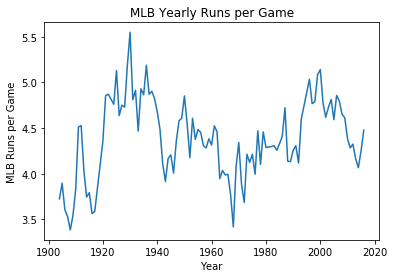

In [23]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

Going to add the runs per game to the original data frame

In [24]:
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

In [25]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,IPouts,HA,HRA,BBA,SOA,E,DP,FP,win_bins,mlb_rpg
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,4314,1391,180,713,973,192,154.0,0.969,3,4.525175
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,4398,1412,118,616,858,175,153.0,0.972,3,4.460518
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,4365,1317,120,578,889,163,155.0,0.974,3,3.946881
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,4350,1273,100,530,965,138,168.0,0.978,3,4.035670
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,4323,1259,91,563,847,123,149.0,0.981,3,3.988293


##### Feature Engineering

We are going to now add some features to indicate specific eras.

We are going to create the "year_label" column, which will give our algorithm information about how certain years are related. For example, identifying the dead ball eras and live ball/steroid eras

In [26]:
def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8

# Add "year_label" column to df
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate 'df' and 'dummy_df' so that we have one dataframe to work with
df = pd.concat([df,dummy_df], axis=1)

# Then we are going to drop the 'year_label' column as that won't be needed anymore as it's captured in dummy columns.
df.drop('year_label',axis=1,inplace=True)

In [27]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,win_bins,mlb_rpg,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,3,4.525175,0,0,0,1,0,0,0,0
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,3,4.460518,0,0,0,1,0,0,0,0
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,3,3.946881,0,0,0,0,1,0,0,0
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,3,4.035670,0,0,0,0,1,0,0,0
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,3,3.988293,0,0,0,0,1,0,0,0


Taking the same method from above, we are now goign to create dummy variables for each decade. 

In [28]:
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df,decade_df],axis=1)
df.drop(['decade_label','yearID'],axis=1,inplace=True)

In [29]:
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,...,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,LAA,162,70,744,5424,1331,218,22,189,681,...,0,0,0,0,1,0,0,0,0,0
1,LAA,162,86,718,5499,1377,232,35,137,602,...,0,0,0,0,1,0,0,0,0,0
2,LAA,161,70,597,5506,1378,208,38,95,448,...,0,0,0,0,1,0,0,0,0,0
3,LAA,162,82,544,5362,1297,186,27,102,472,...,0,0,0,0,1,0,0,0,0,0
4,CAL,162,75,527,5354,1279,200,36,92,443,...,0,0,0,0,1,0,0,0,0,0


A couple more features that we want to add for our algorithm.

In the game of baseball, it's all about how many runs you score and how many runs you allow. Runs per game and runs allowed per game will be great features to add to our data set and account for in our model. We have the information that we need to do this in the "R", "RA" and "G" columns.

In [31]:
# Creating new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

In [33]:
df[['R_per_game','RA_per_game']].head()

,R_per_game,RA_per_game
0,4.592593,4.839506
1,4.432099,4.358025
2,3.708075,4.099379
3,3.358025,3.401235
4,3.253086,3.512346


Now we are going to make a couple of visualizations to see if "R_per_game" and "RA_per_game" have any relationship with our target variable "W" or Wins. We are going to plot scatter plots below to visualize this.

Based on these plots, we can see that there is some linear relationship between the variables we feature engineered and the target variable.

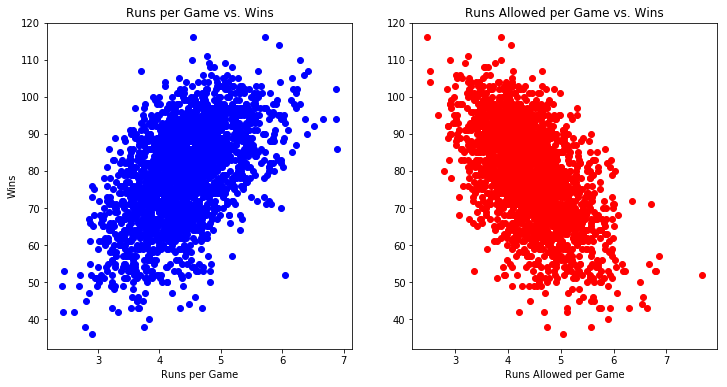

In [34]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

Let's also take a look at the correlations of all the variables with the target variable

In [54]:
correlation_with_W = pd.DataFrame(df.corr()['W'])
correlation_with_W.columns = ['corr_with_W']
correlation_with_W

,corr_with_W
G,0.178958
W,1.000000
R,0.551504
AB,0.233996
H,0.380281
2B,0.262323
3B,0.016970
HR,0.312713
BB,0.345348
SO,0.072069


## K-Means Clustering

Another feature we could add to the data set are labels that are derived from K-Means clustering.

---

#### K-Means is the most popular clustering algorithm

K-means is one of the easier methods to understand and other clustering techniques use some of the same assumptions that K-Means relies on.

- **K** is the number of clusters.
- **Means** refers to the mean points of the K clusters.

The number of clusters $k$ is chosen in advance. The goal is to partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**. 

**K-means iterative fitting:**
1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid. 
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

> **Note:** Unfortunately there is no formula to determine the absolute best number of $k$ clusters. Unsupervised learning is inherently subjective! We can, however, choose the "best" $k$ based on predetermined criteria. 

#### A note on K-Means convergence

---

In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data.  It's entirely possible – in fact, *common* – that the clusters do not mean anything at all. 

**Knowing your domain and dataset is essential. Evaluating the clusters visually is a must (if possible).**

> _"Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference."_ [sklearn Clustering Guide](http://scikit-learn.org/stable/modules/clustering.html#k-means)

![](http://www.datamilk.com/kmeans_animation.gif)

### Metrics: inertia and the silhouette coefficient

---

**Inertia** -- sum of squared errors for each cluster
- low inertia = dense cluster

**Silhouette Coefficient** -- measure of how far apart clusters are
- high Silhouette Score = clusters are well separated

The silhouette coefficient evaluates the viability of your clusters. It is a way to quantify the "cohesion" of local points to their clusters and the seperation to other clusters.

In [86]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

We want to find the number of clusters that gives us the highest Silhouette Coefficient. So we will develop a silhouette score dictionary.

You can get a better idea of your ideal number of clusters by using sklearn’s silhouette_score() function. This function returns the mean silhouette coefficient over all samples. You want a higher silhouette score, and the score decreases as more clusters are added.

In [74]:
X = df.drop(['W','teamID'],axis=1)
y = df['W']

In [78]:
# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(X)
    s_s = silhouette_score(X, l)
    s_score_dict[i] = [s_s]

In [80]:
s_score_dict

{2: [0.39069917116476305],
 3: [0.33807515796715432],
 4: [0.25336890371238802],
 5: [0.23566942762354995],
 6: [0.21380773087983412],
 7: [0.19582053778887473],
 8: [0.18413835193944847],
 9: [0.1759701970460667],
 10: [0.171524386176755]}

We want higher number of clusters to create some differentiation but at the same time, we need some clear separation which is hard to do with a higher number of clusters. So let's try to use 5 clusters for this.

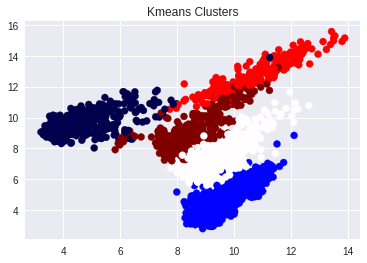

In [118]:
# Create K-means model and determine euclidian distances for each data point
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

distances = pipe.fit_transform(X)

# Create scatter plot using labels from K-means model as color
labels = pipe.named_steps['kmeans'].labels_

plt.scatter(distances[:,0], distances[:,1], c=labels, cmap='seismic')
plt.title('Kmeans Clusters')

Now we are going to add the labels of our clusters to the data set as a new column.

In [100]:
df['labels'] = labels
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,...,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,labels
0,LAA,162,70,744,5424,1331,218,22,189,681,...,0,1,0,0,0,0,0,4.592593,4.839506,4
1,LAA,162,86,718,5499,1377,232,35,137,602,...,0,1,0,0,0,0,0,4.432099,4.358025,4
2,LAA,161,70,597,5506,1378,208,38,95,448,...,0,1,0,0,0,0,0,3.708075,4.099379,4
3,LAA,162,82,544,5362,1297,186,27,102,472,...,0,1,0,0,0,0,0,3.358025,3.401235,4
4,CAL,162,75,527,5354,1279,200,36,92,443,...,0,1,0,0,0,0,0,3.253086,3.512346,4


### Linear Model w/ Regularization¶
Now we are going to build out a predictive model - starting with linear regression with regularization. Regularization is a method for adding additional constraints or penalty to a model, with the goal of preventing overfitting and improving generalization.

In [101]:
from sklearn.model_selection import train_test_split

In [103]:
X = df.drop(['W','teamID'],axis=1)
y = df['W']

##### Scaling and Train-Test-Split
Statistics are going to vary in scale as there are some statistics that are just going to be inherently higher values than others. But the magnitude shouldn't determine the magnitude of the end result (wins). So I am going to scale the data so that the statistical variables are standardized by scaling to unit variance.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
import sklearn.linear_model as lm
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [106]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso())),
    ('regr', lm.LinearRegression())
])

lr_params = {
    'sfm__estimator':[Lasso(random_state=42), Ridge(random_state=42)]
}

lr_gs = GridSearchCV(lr_pipe,lr_params,n_jobs=-1,cv=10)

In [107]:
lr_gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        prefit=False, threshold=None)), ('regr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'sfm__estimator': [Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=

In [108]:
print(lr_gs.best_score_)
print(lr_gs.best_params_)

0.942070571395
{'sfm__estimator': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)}


In [109]:
lr_gs.score(X_train,y_train)

0.94309158286932804

In [110]:
lr_gs.score(X_test,y_test)

0.94358525878000732

In [111]:
linear_test_preds = lr_gs.predict(X_test)
print('Linear MAE:', mean_absolute_error(linear_test_preds, y_test))
print('Linear MSE:', mean_squared_error(linear_test_preds, y_test))

Linear MAE: 2.38615797268
Linear MSE: 9.17928374826


In [112]:
lr_gs_results = pd.DataFrame(lr_gs.cv_results_)
lr_gs_results.sort_values('rank_test_score', ascending=True).T

,1,0
mean_fit_time,0.0499453,0.013356
mean_score_time,0.000723386,0.000913596
mean_test_score,0.942071,0.934818
mean_train_score,0.943979,0.936831
param_sfm__estimator,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
params,"{'sfm__estimator': Ridge(alpha=1.0, copy_X=Tru...","{'sfm__estimator': Lasso(alpha=1.0, copy_X=Tru..."
rank_test_score,1,2
split0_test_score,0.930362,0.919111
split0_train_score,0.945975,0.938541
split1_test_score,0.953813,0.949539


##### Feature Importances

Taking this model, we can analyze feature importances by examining the coefficients. When all features are on the same scale, the most important features should have the highest coefficients in the model, while features uncorrelated with the target variable should have coefficient values close to zero.

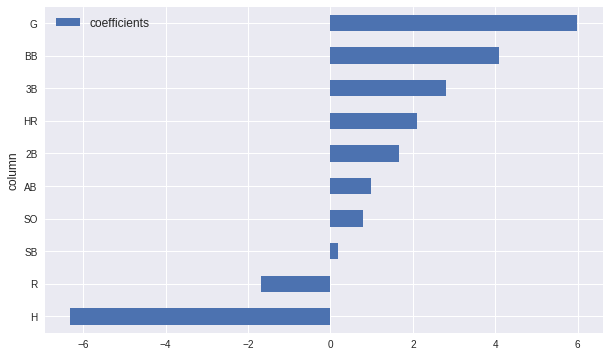

In [115]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

lr_feat_importances = lr_gs.best_estimator_.named_steps['regr'].coef_
lr_cols_and_imps = list(zip(X_train.columns, lr_feat_importances))
lr_cols_and_imps.sort(key=lambda x:x[1], reverse=False)

lr_feat_imp_df = pd.DataFrame(lr_cols_and_imps)
lr_feat_imp_df.rename(columns={1:'coefficients',0:'column'}, inplace=True)
lr_feat_imp_df = lr_feat_imp_df

lr_feat_imp_df.plot.barh('column','coefficients', figsize=(10,6))

plt.show()

### ElasticNet Regressor

Going to try out a more complex Linear Model - ElasticNet

In [128]:
en_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso())),
    ('regr', ElasticNet())
])

en_params = {
    'sfm__estimator':[Lasso(), Ridge()],
    'regr__l1_ratio':[.1,.3,.5,.7,.9],
    'regr__alpha':np.linspace(0,1,20)
}

en_gs = GridSearchCV(en_pipe,
                      param_grid=en_params,
                      n_jobs=-1,
                      cv = ShuffleSplit(random_state=42)
                     )

In [129]:
en_gs.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordi

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coor

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coor

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coor

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordi

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Co

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.1, train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False...alse, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'sfm__estimator': [Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize...895,
        0.63158,  0.68421,  0.73684,  0.78947,  0.84211,  0.89474,
        0.94737,  1.   

In [130]:
en_gs.best_params_

{'regr__alpha': 0.0,
 'regr__l1_ratio': 0.1,
 'sfm__estimator': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001)}

In [131]:
en_gs.best_score_

0.94011570088304752

In [132]:
en_gs.score(X_train,y_train)

0.94308472436095081

In [133]:
en_gs.score(X_test,y_test)

0.94353071718370018

In [134]:
en_gs_results = pd.DataFrame(en_gs.cv_results_)
en_gs_results.sort_values('rank_test_score', ascending=True).T

,9,1,7,3,5,19,17,15,13,11,...,162,140,172,150,182,160,192,170,180,190
mean_fit_time,0.145537,0.1302,0.123516,0.153397,0.129379,0.0815689,0.0767502,0.0848213,0.0757024,0.0890268,...,0.0313098,0.030839,0.0305715,0.0246074,0.0264949,0.0458001,0.0277558,0.034022,0.0288637,0.0236355
mean_score_time,0.00108144,0.00108609,0.00101156,0.0014529,0.00162487,0.000793624,0.000766802,0.000782919,0.000850534,0.00193589,...,0.000964475,0.00304823,0.00490713,0.00789461,0.00191472,0.00527225,0.00398939,0.000846577,0.0008605,0.00215423
mean_test_score,0.940116,0.940116,0.940116,0.940116,0.940116,0.937628,0.937563,0.937465,0.937316,0.937139,...,0.843963,0.839282,0.836919,0.831066,0.829835,0.822837,0.822723,0.814615,0.806413,0.798246
mean_train_score,0.944169,0.944169,0.944169,0.944169,0.944169,0.942777,0.942765,0.942662,0.942496,0.942313,...,0.852434,0.847841,0.845481,0.839734,0.838484,0.831608,0.831456,0.823483,0.815375,0.807297
param_regr__alpha,0,0,0,0,0,0.0526316,0.0526316,0.0526316,0.0526316,0.0526316,...,0.842105,0.736842,0.894737,0.789474,0.947368,0.842105,1,0.894737,0.947368,1
param_regr__l1_ratio,0.9,0.1,0.7,0.3,0.5,0.9,0.7,0.5,0.3,0.1,...,0.3,0.1,0.3,0.1,0.3,0.1,0.3,0.1,0.1,0.1
param_sfm__estimator,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",...,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
params,"{'regr__alpha': 0.0, 'regr__l1_ratio': 0.9, 's...","{'regr__alpha': 0.0, 'regr__l1_ratio': 0.1, 's...","{'regr__alpha': 0.0, 'regr__l1_ratio': 0.7, 's...","{'regr__alpha': 0.0, 'regr__l1_ratio': 0.3, 's...","{'regr__alpha': 0.0, 'regr__l1_ratio': 0.5, 's...","{'regr__alpha': 0.0526315789474, 'regr__l1_rat...","{'regr__alpha': 0.0526315789474, 'regr__l1_rat...","{'regr__alpha': 0.0526315789474, 'regr__l1_rat...","{'regr__alpha': 0.0526315789474, 'regr__l1_rat...","{'regr__alpha': 0.0526315789474, 'regr__l1_rat...",...,"{'regr__alpha': 0.842105263158, 'regr__l1_rati...","{'regr__alpha': 0.736842105263, 'regr__l1_rati...","{'regr__alpha': 0.894736842105, 'regr__l1_rati...","{'regr__alpha': 0.789473684211, 'regr__l1_rati...","{'regr__alpha': 0.947368421053, 'regr__l1_rati...","{'regr__alpha': 0.842105263158, 'regr__l1_rati...","{'regr__alpha': 1.0, 'regr__l1_ratio': 0.3, 's...","{'regr__alpha': 0.894736842105, 'regr__l1_rati...","{'regr__alpha': 0.947368421053, 'regr__l1_rati...","{'regr__alpha': 1.0, 'regr__l1_ratio': 0.1, 's..."
rank_test_score,1,1,1,1,1,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
split0_test_score,0.947684,0.947684,0.947684,0.947684,0.947684,0.945114,0.945017,0.944745,0.944361,0.943972,...,0.842116,0.837739,0.834605,0.829036,0.827071,0.820344,0.819528,0.811682,0.803062,0.794497


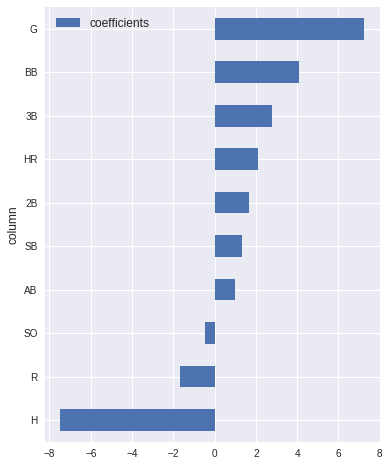

In [135]:
el_feat_importances = en_gs.best_estimator_.named_steps['regr'].coef_
el_cols_and_imps = list(zip(X_train.columns, el_feat_importances))
el_cols_and_imps.sort(key=lambda x:x[1], reverse=False)

el_feat_imp_df = pd.DataFrame(el_cols_and_imps)
el_feat_imp_df.rename(columns={1:'coefficients',0:'column'}, inplace=True)
el_feat_imp_df = el_feat_imp_df

el_feat_imp_df.plot.barh('column','coefficients', figsize=(6,8))
plt.show()

### Random Forest Regressor

The linear model did pretty good but it might not be the best model. Now, let's try using a Random Forest which should have a lot of benefits for our data. It's a non-parametric model - so it can predict variables that are non-normally distributed and it doesn't really care for variance in the data.

Random Forests are a combination of tree predictors where each tree depends on the values of a random vector sampled independently with the same distribution for all trees in the forest. The basic principle is that a group of “weak learners” can come together to form a “strong learner”. Random Forests are a wonderful tool for making predictions considering they do not overfit because of the law of large numbers.

So let's implement this below and see how it does:

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso())),
    ('reg',RandomForestRegressor(random_state=42))
])

rf_params = {
    'reg__n_estimators':range(100,300,10),
    'reg__max_depth':[1,3,5,7,10,None],
    'sfm__estimator':[Lasso(), Ridge()]
}

rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, n_jobs=-1, cv=8, verbose=1)

In [120]:
rf_gs.fit(X_train,y_train)

Fitting 8 folds for each of 240 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  6.6min finished


GridSearchCV(cv=8, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False...estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'reg__n_estimators': range(100, 300, 10), 'reg__max_depth': [1, 3, 5, 7, 10, None], 'sfm__estimator': [Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)]},
       pre_dispatch='2*n_jobs', refit=

In [121]:
rf_gs.best_params_

{'reg__max_depth': 10,
 'reg__n_estimators': 240,
 'sfm__estimator': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False)}

In [122]:
rf_gs.best_score_

0.93251325381278483

In [123]:
rf_gs.score(X_train,y_train)

0.97988347475764903

In [124]:
rf_gs.score(X_test,y_test)

0.92874953803083837

#### Feature Importances

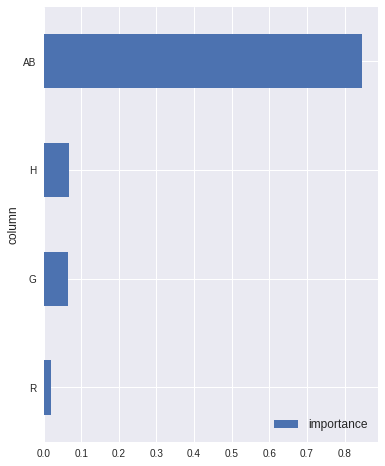

In [126]:
rf_feat_importances = rf_gs.best_estimator_.named_steps['reg'].feature_importances_
rf_cols_and_imps = list(zip(X_train.columns, rf_feat_importances))
rf_cols_and_imps.sort(key=lambda x:x[1], reverse=False)

rf_feat_imp_df = pd.DataFrame(rf_cols_and_imps)
rf_feat_imp_df.rename(columns={1:'importance',0:'column'}, inplace=True)
rf_feat_imp_df = rf_feat_imp_df

rf_feat_imp_df.plot.barh('column','importance', figsize=(6,8))
plt.show()

In [127]:
rf_feat_importances

array([ 0.06579095,  0.0202991 ,  0.84756338,  0.06634657])

## Model Evaluation

In [138]:
linear_test_preds = lr_gs.predict(X_test)
en_test_preds = en_gs.predict(X_test)
rf_test_preds = rf_gs.predict(X_test)

In [141]:
print('Linear MAE:', mean_absolute_error(linear_test_preds, y_test))
print('Linear MSE:', mean_squared_error(linear_test_preds, y_test))
print('Linear R2:', lr_gs.score(X_test, y_test))
print('ElasticNet MAE:', mean_absolute_error(en_test_preds, y_test))
print('ElasticNet MSE:', mean_squared_error(en_test_preds, y_test))
print('ElasticNet R2:', en_gs.score(X_test,y_test))
print('RandomForest MAE:', mean_absolute_error(rf_test_preds, y_test))
print('RandomForest MSE:', mean_squared_error(rf_test_preds, y_test))
print('RandomForest R2:',rf_gs.score(X_test,y_test))

Linear MAE: 2.38615797268
Linear MSE: 9.17928374826
Linear R2: 0.94358525878
ElasticNet MAE: 2.38618899082
ElasticNet MSE: 9.18815825123
ElasticNet R2: 0.943530717184
RandomForest MAE: 2.71690263736
RandomForest MSE: 11.5932147071
RandomForest R2: 0.928749538031


In [142]:
results_dict = {
    'MAE':[mean_absolute_error(linear_test_preds, y_test),
           mean_absolute_error(en_test_preds, y_test),
           mean_absolute_error(rf_test_preds, y_test)],
    'MSE':[mean_squared_error(linear_test_preds, y_test),
           mean_squared_error(en_test_preds, y_test),
           mean_squared_error(rf_test_preds, y_test)],
    'R2':[lr_gs.score(X_test,y_test),
          en_gs.score(X_test,y_test),
          rf_gs.score(X_test,y_test)]
}

In [143]:
results_df = pd.DataFrame(results_dict).T
results_df.columns = ['linear','elastic_net','random_forest']
results_df

,linear,elastic_net,random_forest
MAE,2.386158,2.386189,2.716903
MSE,9.179284,9.188158,11.593215
R2,0.943585,0.943531,0.928750


Based on the model evaulation, it looks like it would be best to go with the linear model as it has the highest R2 score and the lowest error.